# Clustering on speed dating dataset

Dataset taken from https://www.kaggle.com/datasets/ulrikthygepedersen/speed-dating

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

All of the data transformations done in the next cells are taken from a previous exercise with this dataset: https://github.com/jcasarmiento/CrossValidation

In [2]:
df=pd.read_csv("speeddating.csv",header=0)
df=df.drop(["expected_num_interested_in_me","expected_num_matches","shared_interests_o","shared_interests_partner","ambitous_o","ambition_partner"],axis=1)
df=df.dropna(how="any")
to_drop=["has_null","wave","d_age","d_d_age","samerace","d_importance_same_race","d_importance_same_religion","d_pref_o_attractive","d_pref_o_sincere",\
        "d_pref_o_intelligence","d_pref_o_funny","d_pref_o_ambitious","d_pref_o_shared_interests","d_attractive_o","d_sinsere_o","d_intelligence_o",\
        "d_funny_o","d_ambitous_o","d_shared_interests_o","d_attractive_important","d_sincere_important","d_intellicence_important","d_funny_important",\
        "d_ambtition_important","d_shared_interests_important","d_attractive","d_sincere","d_intelligence","d_funny","d_ambition","d_attractive_partner",\
        "d_sincere_partner","d_intelligence_partner","d_funny_partner","d_ambition_partner","d_shared_interests_partner","d_sports","d_tvsports","d_exercise",\
        "d_dining","d_museums","d_art","d_hiking","d_gaming","d_clubbing","d_reading","d_tv","d_theater","d_movies","d_concerts","d_music","d_shopping","d_yoga",\
        "d_interests_correlate","d_expected_happy_with_sd_people","d_expected_num_interested_in_me","d_expected_num_matches","like","guess_prob_liked","d_like",\
        "d_guess_prob_liked","met","decision","decision_o"]
df=df.drop(to_drop,axis=1)
y = df.pop('match')  # labels correspond to column match
df = pd.get_dummies(df,drop_first=True)  #data is rest of columns and there is still categorical colums

In [3]:
y.shape,type(y),df.shape,type(df)

((7079,), pandas.core.series.Series, (7079, 312), pandas.core.frame.DataFrame)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(df)
X

array([[-1.51065932,  0.19618885, -0.62941637, ..., -0.04608083,
        -0.01188625, -0.04289285],
       [-1.51065932, -1.23913653, -0.62941637, ..., -0.04608083,
        -0.01188625, -0.04289285],
       [-1.51065932, -0.95207146, -0.62941637, ..., -0.04608083,
        -0.01188625, -0.04289285],
       ...,
       [-0.37112527, -0.66500638, -0.98247806, ..., -0.04608083,
        -0.01188625, -0.04289285],
       [-0.37112527, -1.23913653, -0.98247806, ..., -0.04608083,
        -0.01188625, -0.04289285],
       [-0.37112527, -1.23913653, -0.98247806, ..., -0.04608083,
        -0.01188625, -0.04289285]])

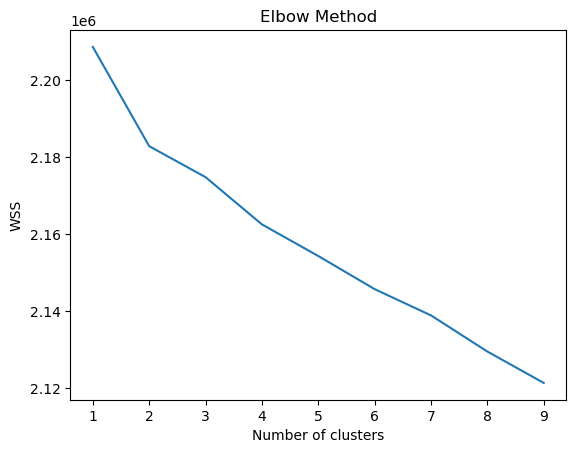

In [5]:
from sklearn.cluster import KMeans

WSS = []
for k in range(1,10,1):
    k_means=KMeans(n_clusters=k, random_state=0,n_init=10)
    k_means.fit(X)
    WSS.append(k_means.inertia_)

plt.plot(range(1,10,1), WSS)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

For K-means, optimal k is between 2 and 3

In [6]:
k_means=KMeans(n_clusters=2, random_state=0,n_init=10)
k_means.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [7]:
centroids=k_means.cluster_centers_
df_centroids=pd.DataFrame(centroids,columns=df.columns)
df_centroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 312 entries, age to field_b'working'
dtypes: float64(312)
memory usage: 5.0 KB


In [8]:
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
y=pd.get_dummies(y,drop_first=True)
y.columns

Index(['b'1''], dtype='object')

In [10]:
y.rename(columns={"b'1'":"Match"},inplace=True)
y.columns

Index(['Match'], dtype='object')

In [11]:
from sklearn.metrics import confusion_matrix,silhouette_score

confusion_matrix(y,k_means.labels_),silhouette_score(X,k_means.labels_)

(array([[2987, 2858],
        [ 592,  642]], dtype=int64),
 0.017536478702628984)

Trying undersampling of dataset: also in the other notebook

In [12]:
ds_df=pd.concat([df,y],axis=1)
# Separate the two classes
df0=ds_df[ds_df["Match"]==0]
df1=ds_df[ds_df["Match"]==1]
df0=df0.sample(n=df1.shape[0],replace=False,random_state=0)   # take out a number of samples from the "bigger" class
ds=pd.concat([df0,df1],ignore_index=True)  #combine
ds=ds.sample(frac=1,random_state=0).reset_index(drop=True)   #shuffle the table, added random state so that it doesn´t change to compare later
yds = ds.pop('Match')  # labels correspond to column match

In [13]:
ds_df.head()

,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,field_b'political science',field_b'psychology and english',field_b'psychology',field_b'social work',field_b'sociology',field_b'speech pathology',field_b'teaching of English',field_b'theory',field_b'working',Match
0,21.0,27.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
1,21.0,22.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,21.0,23.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,1
4,21.0,24.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,1
5,21.0,25.0,2.0,4.0,50.0,0.0,30.0,10.0,0.0,10.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
ds_df.shape,ds.shape

((7079, 313), (2468, 312))

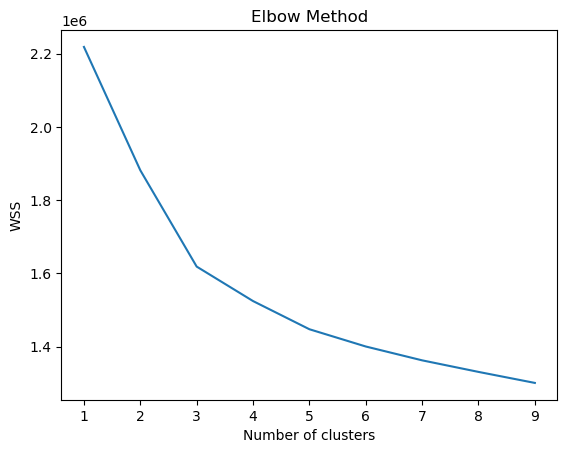

In [15]:
WSS = []
for k in range(1,10,1):
    k_means=KMeans(n_clusters=k, random_state=0,n_init=10)
    k_means.fit(ds)
    WSS.append(k_means.inertia_)

plt.plot(range(1,10,1), WSS)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [16]:
k_means=KMeans(n_clusters=3, random_state=0,n_init=10)
k_means.fit(ds)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [17]:
centroids=k_means.cluster_centers_
df_centroids=pd.DataFrame(centroids,columns=df.columns)
df_centroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 312 entries, age to field_b'working'
dtypes: float64(312)
memory usage: 7.4 KB


In [18]:
df_centroids.head()

,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,field_b'physics',field_b'political science',field_b'psychology and english',field_b'psychology',field_b'social work',field_b'sociology',field_b'speech pathology',field_b'teaching of English',field_b'theory',field_b'working'
0,26.701107,25.405904,3.833948,2.797048,18.823321,18.293764,21.765351,18.343653,11.142472,11.705055,...,-8.673617e-19,0.003690,3.690037e-03,1.734723e-18,-4.336809e-19,-5.204170e-18,3.690037e-03,0.000000,-1.084202e-19,0.000000
1,25.571429,26.710425,3.567568,3.992278,53.169884,8.270270,13.648649,14.679537,3.644788,6.586873,...,-4.336809e-19,0.007722,3.861004e-03,1.544402e-02,3.861004e-03,3.861004e-03,-5.421011e-20,0.000000,-5.421011e-20,0.000000
2,26.171827,26.238906,3.624871,3.666151,19.191863,17.984288,21.177642,17.858560,11.596094,12.215475,...,4.127967e-03,0.006708,-2.168404e-18,3.611971e-03,1.547988e-03,7.223942e-03,-1.084202e-18,0.003096,5.159959e-04,0.003096


In [19]:
clusters=k_means.labels_
clusters.shape

(2468,)

Text(0, 0.5, 'Age partner')

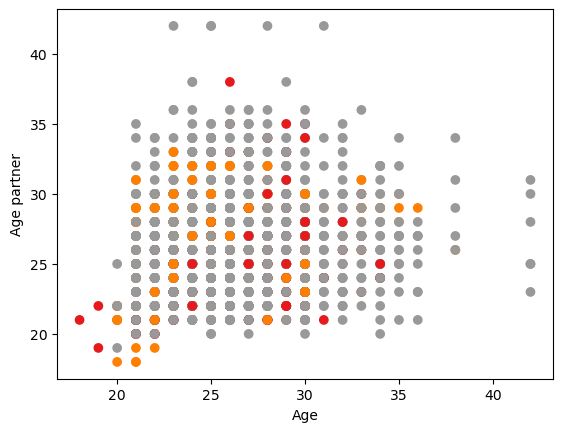

In [20]:
plt.figure()
plt.scatter(ds["age"],ds["age_o"],c=clusters,cmap="Set1")
plt.xlabel("Age")
plt.ylabel("Age partner")

In [21]:
from sklearn.decomposition import PCA

pca=PCA(2)
pca_ds=pca.fit_transform(ds)

In [22]:
pca_ds.shape

(2468, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

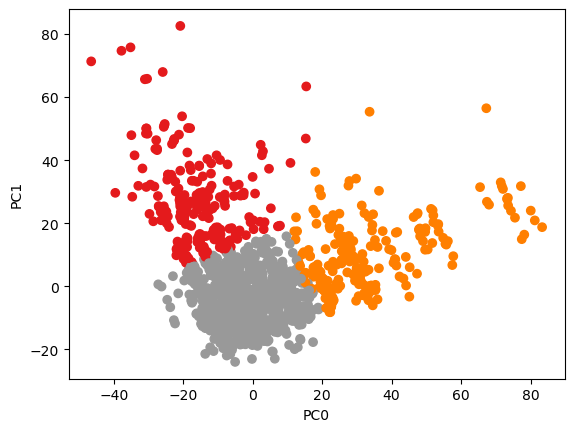

In [23]:
plt.figure()
plt.scatter(x=pca_ds[:,0],y=pca_ds[:,1],c=clusters,cmap="Set1")
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.show

In [24]:
silhouette_score(ds,k_means.labels_)

0.27220801319384

Even though the silhouette_score is low, it increased with the balanced dataset in comparison to the complete dataset

In [25]:
# Revisiting the centroids:
df_centroids.idxmax(axis=1)

0    attractive_important
1       pref_o_attractive
2                   age_o
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

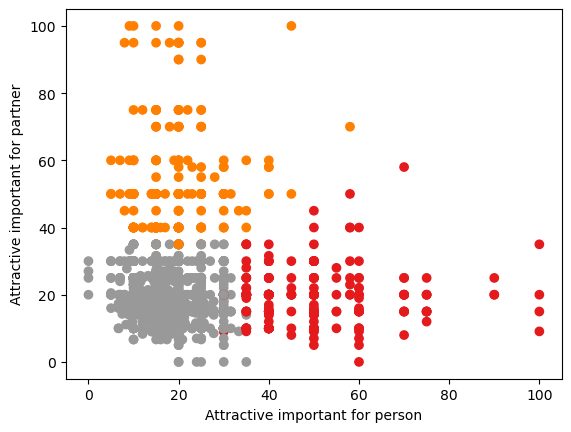

In [26]:
plt.figure()
plt.scatter(x=ds["attractive_important"],y=ds["pref_o_attractive"],c=clusters,cmap="Set1")
plt.xlabel("Attractive important for person")
plt.ylabel("Attractive important for partner")
plt.show

In [27]:
ds["kmeans"]=pd.DataFrame(k_means.labels_)

In [58]:
variables=["age","age_o","importance_same_race","importance_same_religion","pref_o_attractive","pref_o_sincere","pref_o_intelligence",\
 "pref_o_funny","pref_o_ambitious","pref_o_shared_interests","attractive_important","sincere_important","intellicence_important",\
 "funny_important","ambtition_important","shared_interests_important"]

In [59]:
cluster0melt=pd.melt(ds[ds["kmeans"]==0])
cluster1melt=pd.melt(ds[ds["kmeans"]==1])
cluster2melt=pd.melt(ds[ds["kmeans"]==2])
cluster0melt["cluster"]=0
cluster1melt["cluster"]=1
cluster2melt["cluster"]=2

databox=pd.concat(cluster0melt,cluster1melt,cluster2melt)

C:\Users\jsarmiento\AppData\Local\Temp\ipykernel_17836\1921992060.py:8: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  databox=pd.concat(cluster0melt,cluster1melt,cluster2melt)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

C:\Users\jsarmiento\AppData\Local\Temp\ipykernel_17836\2467457832.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


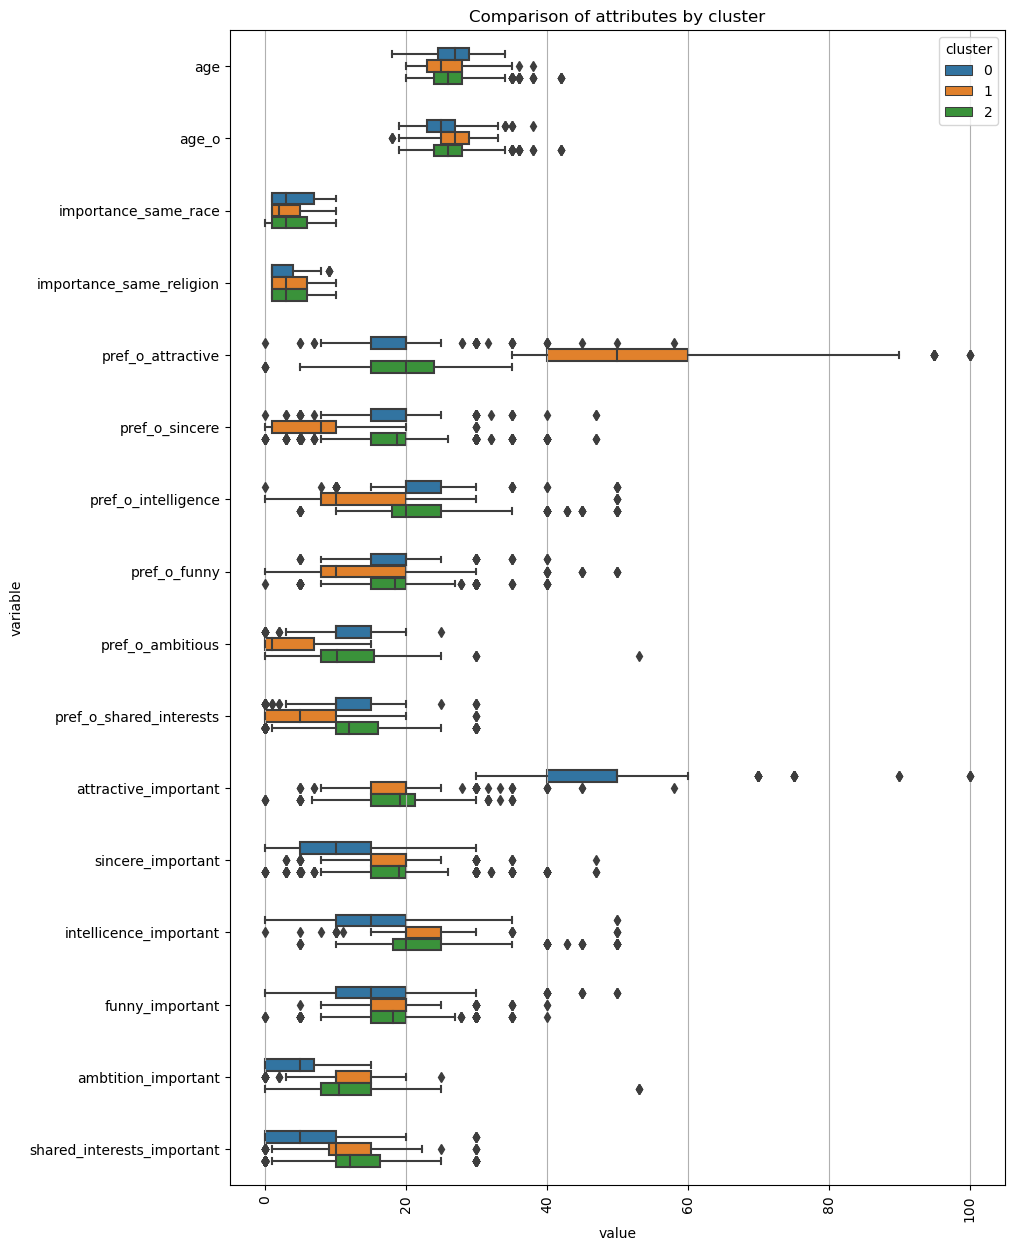

In [66]:
#cluster0:
cluster0melt=pd.melt(ds[ds["kmeans"]==0][variables])
cluster1melt=pd.melt(ds[ds["kmeans"]==1][variables])
cluster2melt=pd.melt(ds[ds["kmeans"]==2][variables])
cluster0melt["cluster"]=0
cluster1melt["cluster"]=1
cluster2melt["cluster"]=2

databox=pd.concat([cluster0melt,cluster1melt,cluster2melt])

fig=plt.figure(figsize=(10,15))
ax=sns.boxplot(x="value",y="variable",data=databox,hue="cluster",width=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.grid(axis="x")
plt.title("Comparison of attributes by cluster")
plt.show()

Looking at the different distributions of the variables inside each cluster, we can see that even if the optimal number of clusters when the classes of match are balanced, 2 of the clusters are pretty similar.